In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('german_credit_data.csv')

In [ ]:
data = data.drop('Unnamed: 0', axis=1)

In [ ]:
data['Risk'] = data['Risk'].map({'good': 0, 'bad': 1})

In [ ]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
data.describe()

,Age,Job,Credit amount,Duration,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,0.300000
std,11.375469,0.653614,2822.736876,12.058814,0.458487
min,19.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,0.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000


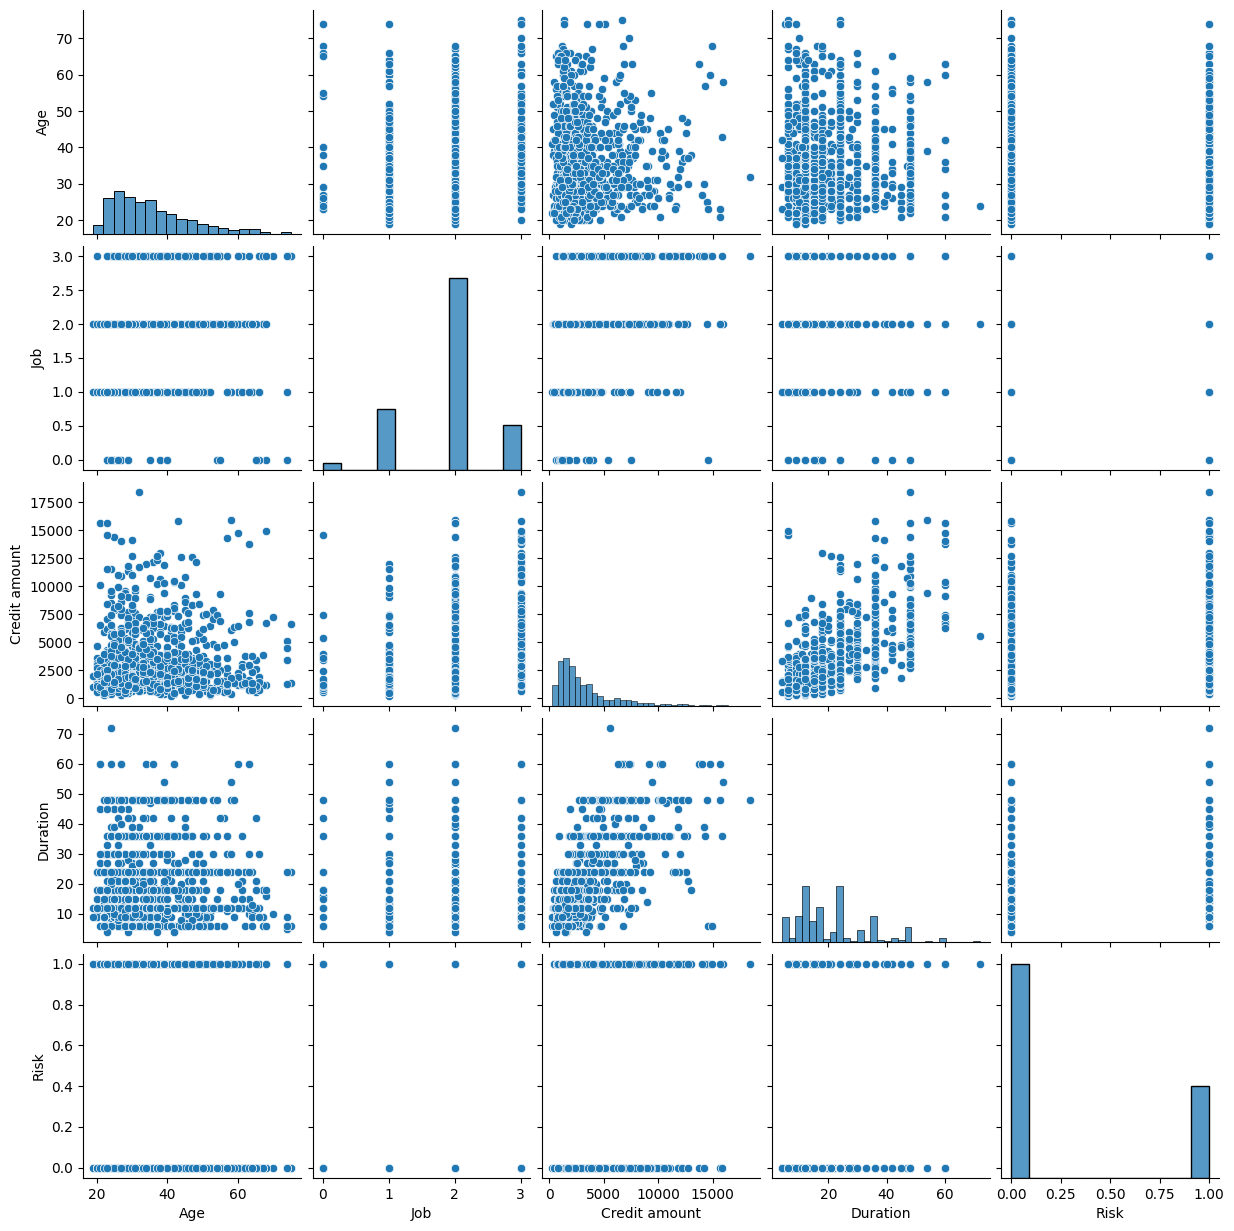

In [ ]:
sns.pairplot(data)

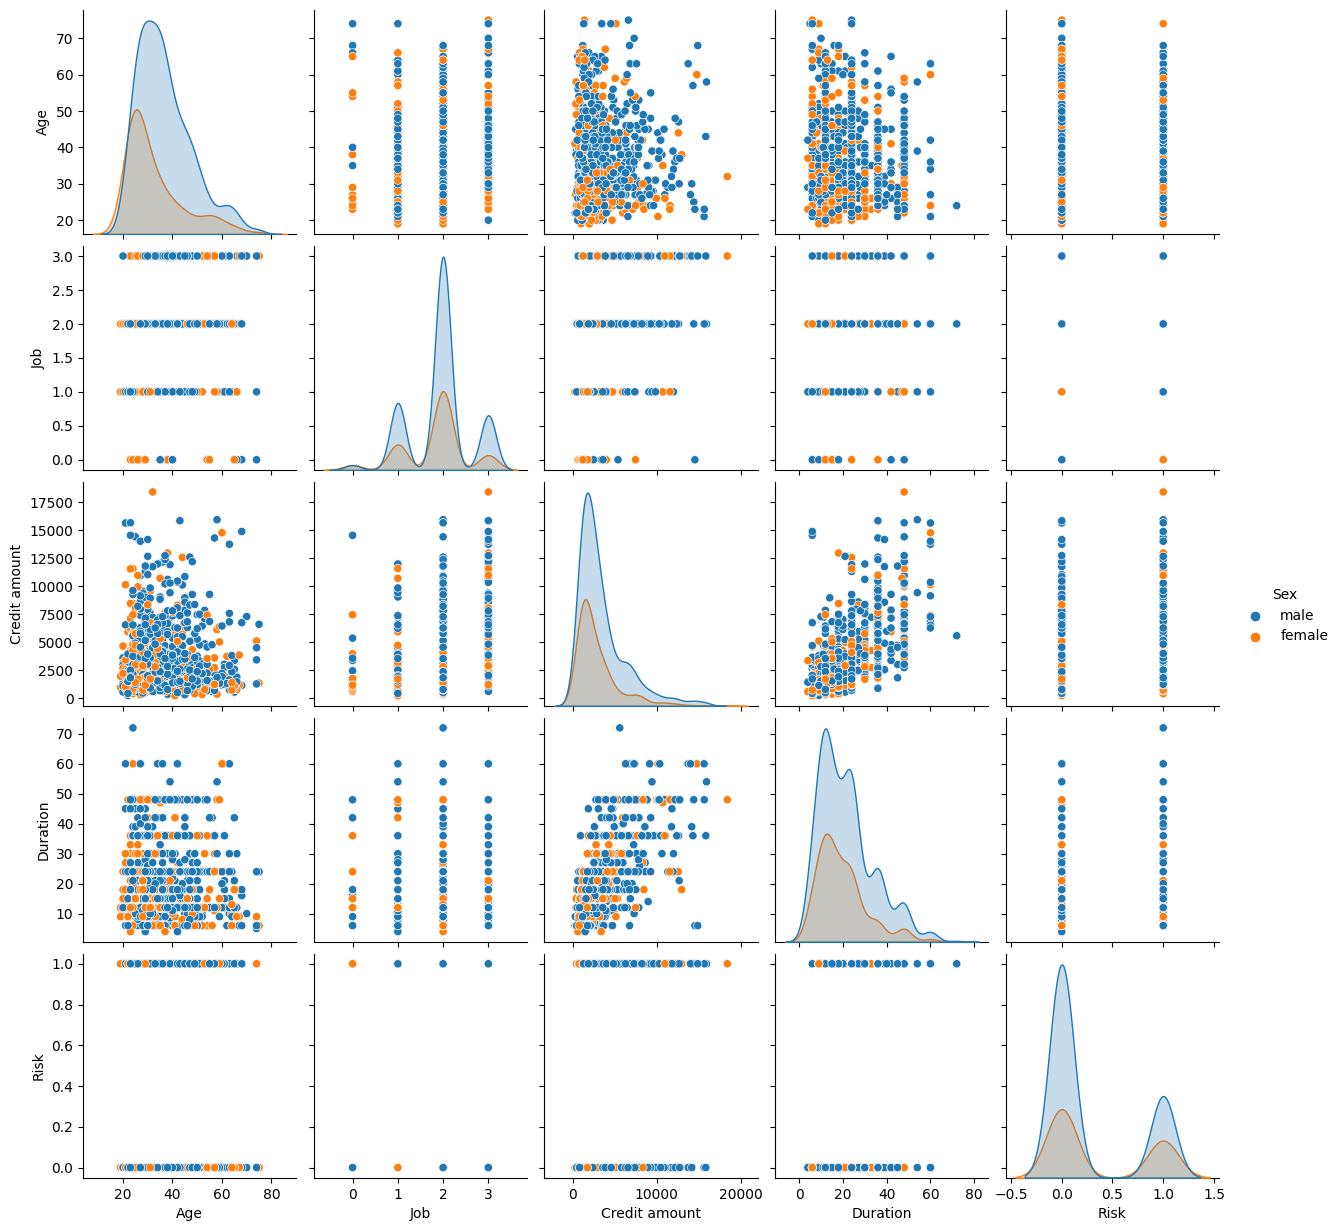

In [ ]:
sns.pairplot(data, hue = 'Sex')

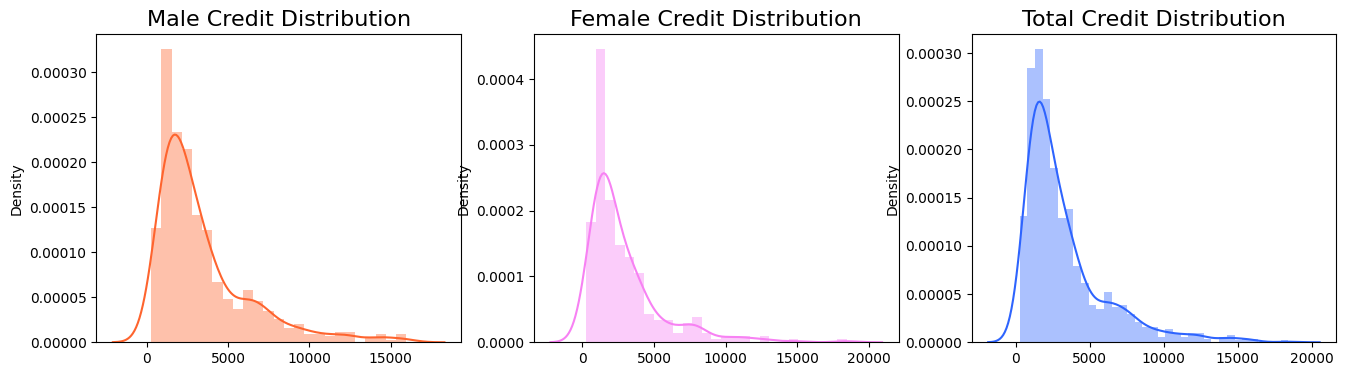

In [ ]:
male_credit = data["Credit amount"].loc[data["Sex"] == "male"].values
female_credit = data["Credit amount"].loc[data["Sex"] == "female"].values
total_credit = data['Credit amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.show()

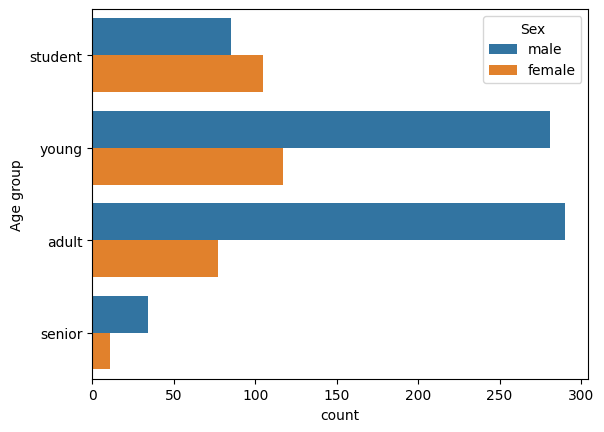

In [ ]:
labels = ("student", "young", "adult", "senior")
groups = pd.cut(data["Age"], labels=labels, bins=(18, 25, 35, 60, 120), ordered=True)
data["Age group"] = groups

sns.countplot(data=data, y="Age group", hue="Sex")
plt.show()

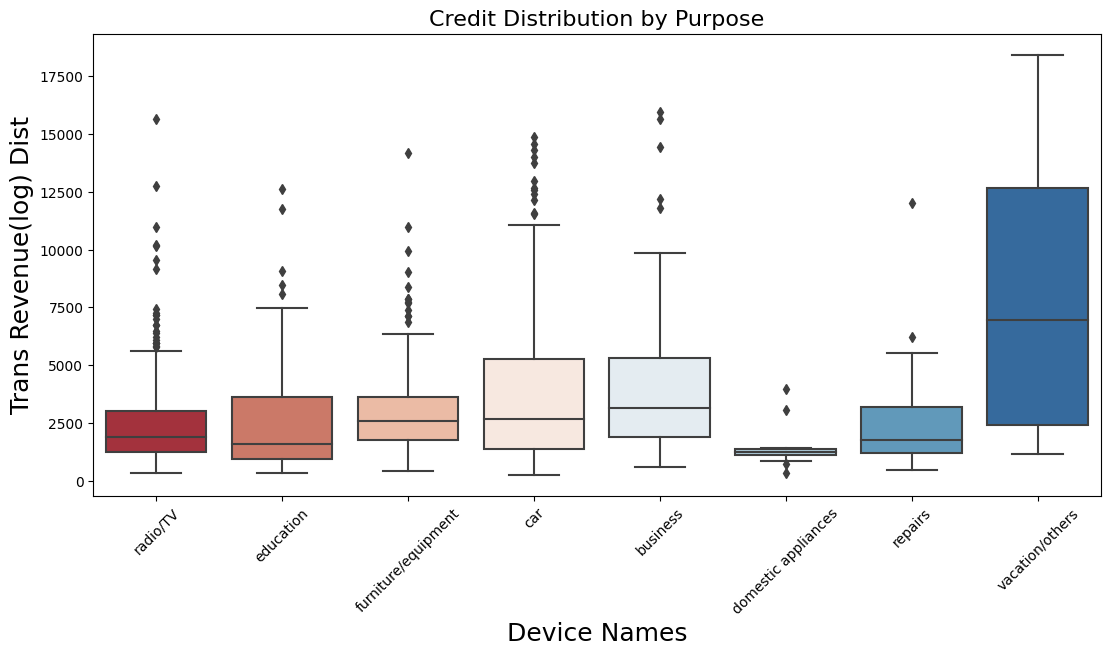

In [ ]:
import seaborn as sns

plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='Purpose', y='Credit amount',
                   data=data, palette="RdBu")


g.set_title("Credit Distribution by Purpose", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel('Device Names', fontsize=18) # Xlabel
g.set_ylabel('Trans Revenue(log) Dist', fontsize=18)
plt.show()

In [ ]:
data['Job'] = data['Job'].astype('category')

In [ ]:
for i in data.select_dtypes(include =['object','category']).columns:
  print(f"{i} : {data[i].unique()}\n")

Sex : ['male' 'female']

Job : [2, 1, 3, 0]
Categories (4, int64): [0, 1, 2, 3]

Housing : ['own' 'free' 'rent']

Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']

Checking account : ['little' 'moderate' nan 'rich']

Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']

Age group : ['senior', 'student', 'adult', 'young']
Categories (4, object): ['student' < 'young' < 'adult' < 'senior']



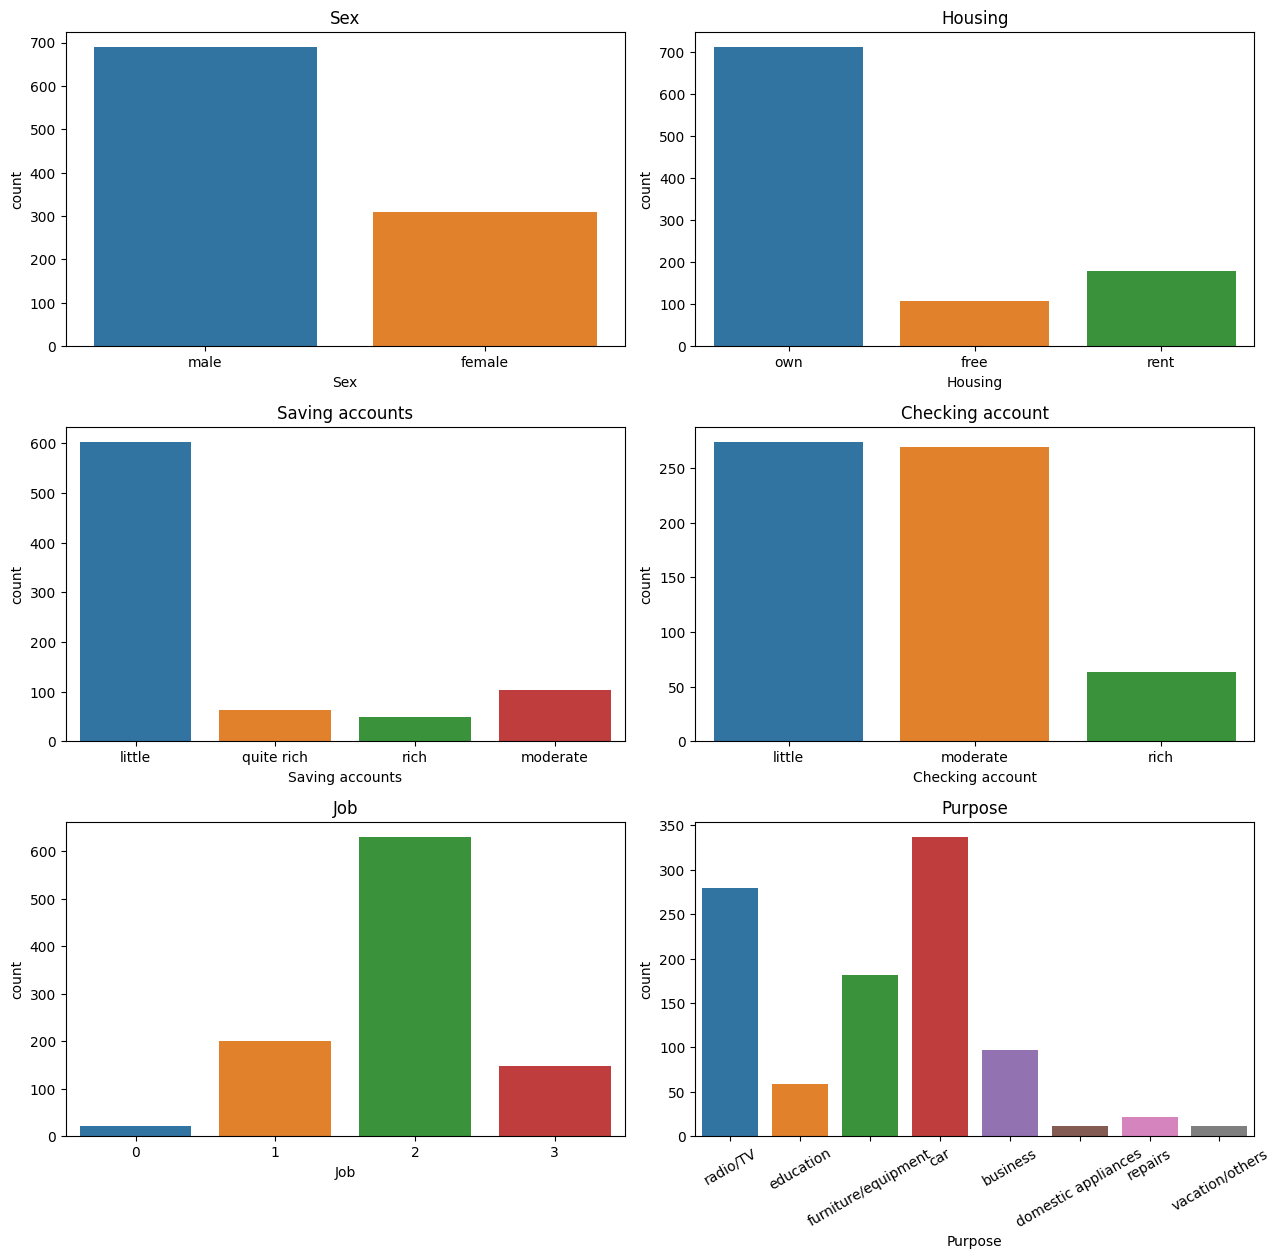

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (13,12))

titles = ["Sex", "Housing", "Saving accounts", "Checking account", 'Job', "Purpose"]

for ax, title in zip(axes.flatten(), titles):
    sns.countplot(x=data[title], ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.xticks(rotation=30)

plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'radio/TV'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'car'),
  Text(4, 0, 'business'),
  Text(5, 0, 'domestic appliances'),
  Text(6, 0, 'repairs'),
  Text(7, 0, 'vacation/others')])

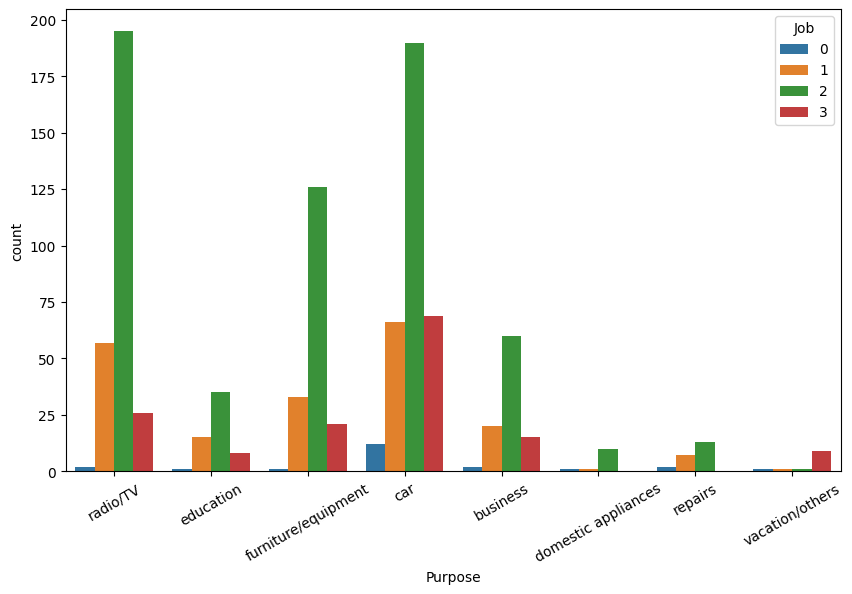

In [ ]:
plt.figure(figsize= (10,6))
sns.countplot(data, x= 'Purpose', hue = 'Job')
plt.xticks(rotation=30)

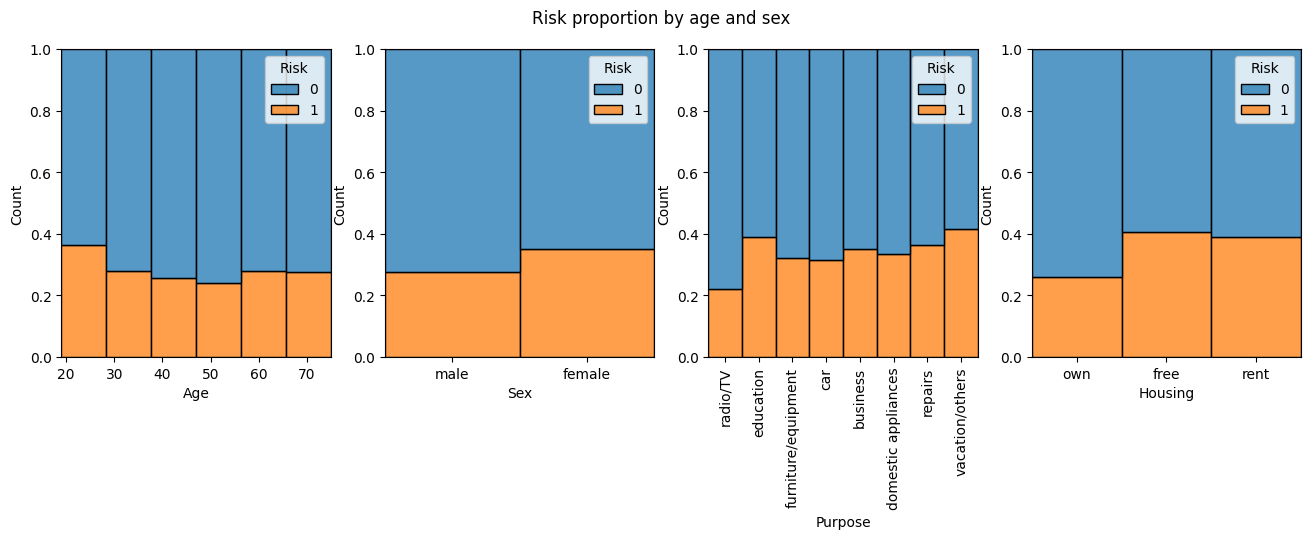

In [ ]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(16, 4))
sns.histplot(data=data, x="Age", hue="Risk", multiple="fill", bins=6, ax=ax0)
sns.histplot(data=data, x="Sex", hue="Risk", multiple="fill", ax=ax1)
sns.histplot(data=data, x="Purpose", hue="Risk", multiple="fill", ax=ax2)
sns.histplot(data=data, x="Housing", hue="Risk", multiple="fill", ax=ax3)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation= 90)
fig.suptitle("Risk proportion by age and sex")
plt.show()

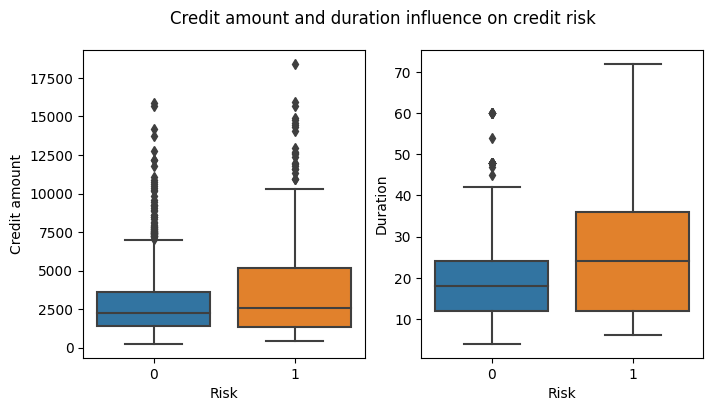

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))
sns.boxplot(data=data, x="Risk", y="Credit amount", ax=ax0)
sns.boxplot(data=data, x="Risk", y="Duration", ax=ax1)
fig.suptitle("Credit amount and duration influence on credit risk")
fig.show()

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
df = data.copy()

In [ ]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age group
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,student
2,49,male,1,own,little,NaN,2096,12,education,0,adult
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,adult
4,53,male,2,free,little,little,4870,24,car,1,adult


In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(drop="first", sparse=False)
onehot_features = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose", "Risk", "Age group"]
X_onehot = onehot.fit_transform(data[onehot_features])
data_onehot = pd.DataFrame(data=X_onehot, columns=onehot.get_feature_names_out(onehot.feature_names_in_))
data_onehot.head()

,Sex_male,Job_1,Job_2,Job_3,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Saving accounts_nan,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_1,Age group_senior,Age group_student,Age group_young
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data = data.drop(onehot_features, axis=1)
data = pd.concat((data, data_onehot), axis=1)

In [ ]:
data


,Age,Credit amount,Duration,Sex_male,Job_1,Job_2,Job_3,Housing_own,Housing_rent,Saving accounts_moderate,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_1,Age group_senior,Age group_student,Age group_young
0,67,1169,6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22,5951,48,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,49,2096,12,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45,7882,42,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,4870,24,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1736,12,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,40,3857,30,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,38,804,12,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
998,23,1845,45,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Risk_1', axis=1), data['Risk_1'], test_size=0.2)

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth= 5)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
print('The confusion_matrix is:\n{:}'.format(confusion_matrix(y_test,y_pred_gini)))
print('The classification report is:\n{:}'.format(classification_report(y_test,y_pred_gini)))
print('The accuracy is: {:.4f}'.format(accuracy_score(y_test,y_pred_gini)))

The confusion_matrix is:
[[118  28]
 [ 33  21]]
The classification report is:
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79       146
         1.0       0.43      0.39      0.41        54

    accuracy                           0.69       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.69      0.69      0.69       200

The accuracy is: 0.6950


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc.predict(X_test)
print('The confusion_matrix is:\n{:}'.format(confusion_matrix(y_test,y_pred_rfc)))
print('The classification report is:\n{:}'.format(classification_report(y_test,y_pred_rfc)))
print('The accuracy is: {:.4f}'.format(accuracy_score(y_test,y_pred_rfc)))

The confusion_matrix is:
[[128  18]
 [ 33  21]]
The classification report is:
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.83       146
         1.0       0.54      0.39      0.45        54

    accuracy                           0.74       200
   macro avg       0.67      0.63      0.64       200
weighted avg       0.73      0.74      0.73       200

The accuracy is: 0.7450


In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBClassifier
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)
print('The confusion_matrix is:\n{:}'.format(confusion_matrix(y_test,y_pred_xgb)))
print('The classification report is:\n{:}'.format(classification_report(y_test,y_pred_xgb)))
print('The accuracy is: {:.4f}'.format(accuracy_score(y_test,y_pred_xgb)))

The confusion_matrix is:
[[120  26]
 [ 30  24]]
The classification report is:
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       146
         1.0       0.48      0.44      0.46        54

    accuracy                           0.72       200
   macro avg       0.64      0.63      0.64       200
weighted avg       0.71      0.72      0.72       200

The accuracy is: 0.7200


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

Classifier: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       146
         1.0       0.49      0.33      0.40        54

    accuracy                           0.73       200
   macro avg       0.63      0.60      0.61       200
weighted avg       0.70      0.72      0.71       200

Confusion Matrix:
[[127  19]
 [ 36  18]]
Accuracy: 0.7250
Precision: 0.4865
Recall: 0.3333
F1 Score: 0.3956
AUC-ROC Score: 0.6974


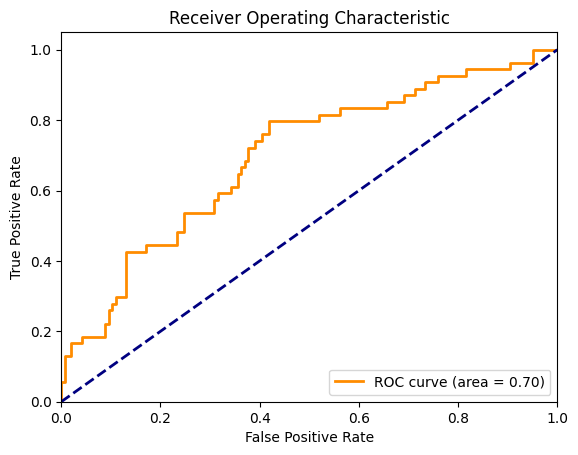

Classifier: Naive Bayes
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78       146
         1.0       0.47      0.67      0.55        54

    accuracy                           0.70       200
   macro avg       0.66      0.69      0.67       200
weighted avg       0.75      0.70      0.72       200

Confusion Matrix:
[[105  41]
 [ 18  36]]
Accuracy: 0.7050
Precision: 0.4675
Recall: 0.6667
F1 Score: 0.5496
AUC-ROC Score: 0.6877


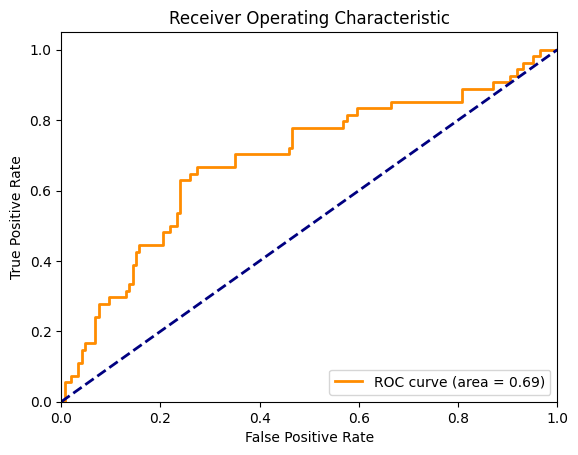

Classifier: Random Forest
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       146
         1.0       0.49      0.35      0.41        54

    accuracy                           0.73       200
   macro avg       0.63      0.61      0.61       200
weighted avg       0.70      0.72      0.71       200

Confusion Matrix:
[[126  20]
 [ 35  19]]
Accuracy: 0.7250
Precision: 0.4872
Recall: 0.3519
F1 Score: 0.4086
AUC-ROC Score: 0.7005


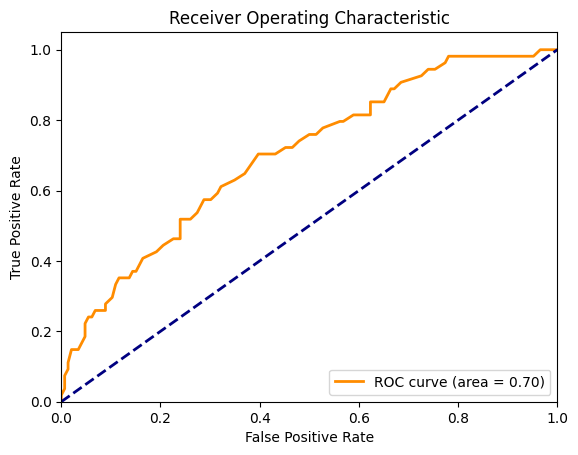

Classifier: SVM
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       146
         1.0       0.52      0.28      0.36        54

    accuracy                           0.73       200
   macro avg       0.64      0.59      0.60       200
weighted avg       0.70      0.73      0.71       200

Confusion Matrix:
[[132  14]
 [ 39  15]]
Accuracy: 0.7350
Precision: 0.5172
Recall: 0.2778
F1 Score: 0.3614
AUC-ROC Score: 0.6920


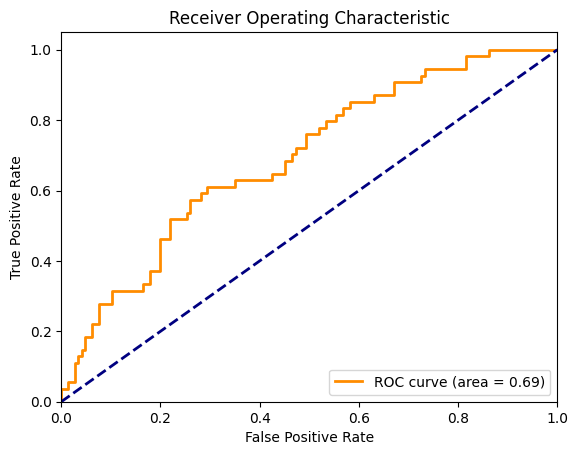

Classifier: KNN
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80       146
         1.0       0.42      0.35      0.38        54

    accuracy                           0.69       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.68      0.69      0.69       200

Confusion Matrix:
[[120  26]
 [ 35  19]]
Accuracy: 0.6950
Precision: 0.4222
Recall: 0.3519
F1 Score: 0.3838
AUC-ROC Score: 0.6339


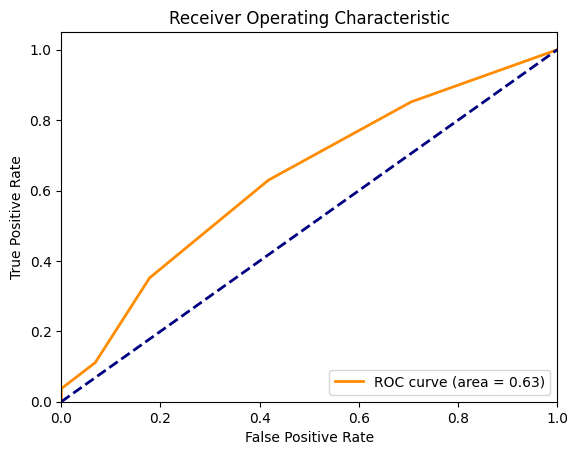

Classifier: Decision Tree
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74       146
         1.0       0.35      0.43      0.39        54

    accuracy                           0.64       200
   macro avg       0.56      0.57      0.56       200
weighted avg       0.66      0.64      0.64       200

Confusion Matrix:
[[104  42]
 [ 31  23]]
Accuracy: 0.6350
Precision: 0.3538
Recall: 0.4259
F1 Score: 0.3866
AUC-ROC Score: 0.5691


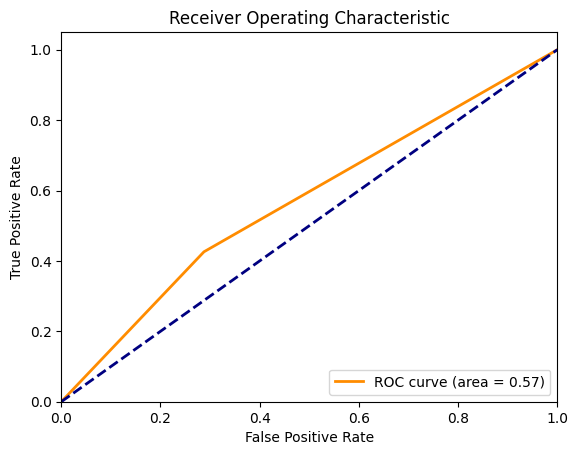

Classifier: XGBoost
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       146
         1.0       0.48      0.44      0.46        54

    accuracy                           0.72       200
   macro avg       0.64      0.63      0.64       200
weighted avg       0.71      0.72      0.72       200

Confusion Matrix:
[[120  26]
 [ 30  24]]
Accuracy: 0.7200
Precision: 0.4800
Recall: 0.4444
F1 Score: 0.4615
AUC-ROC Score: 0.7155


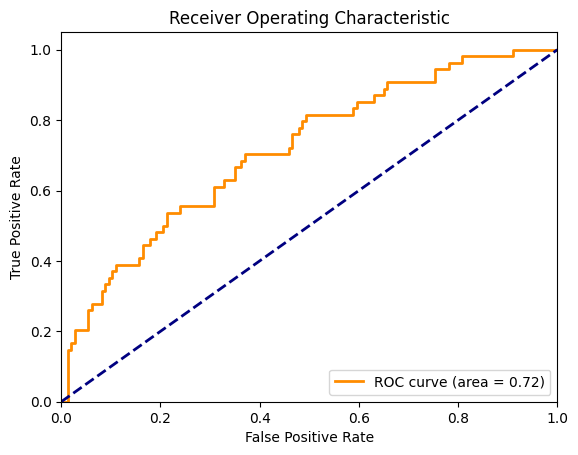

Classifier: Neural Network
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77       146
         1.0       0.38      0.37      0.37        54

    accuracy                           0.67       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.66      0.67      0.66       200

Confusion Matrix:
[[113  33]
 [ 34  20]]
Accuracy: 0.6650
Precision: 0.3774
Recall: 0.3704
F1 Score: 0.3738
AUC-ROC Score: 0.5797


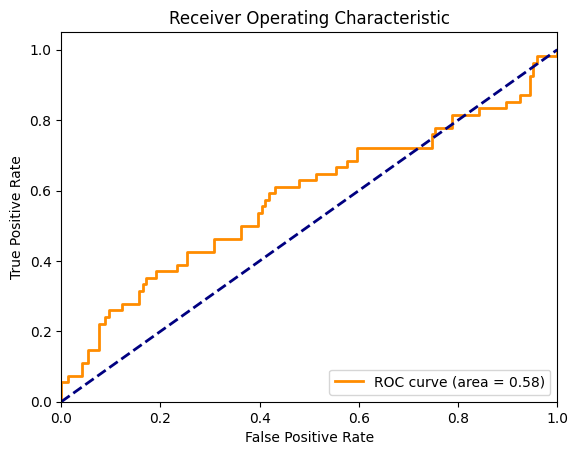

                     Accuracy  Precision    Recall  F1 Score  AUC-ROC Score
Logistic Regression     0.725   0.486486  0.333333  0.395604       0.697362
Naive Bayes             0.705   0.467532  0.666667  0.549618       0.687722
Random Forest           0.725   0.487179  0.351852  0.408602       0.700469
SVM                     0.735   0.517241  0.277778  0.361446       0.692035
KNN                     0.695   0.422222  0.351852  0.383838       0.633879
Decision Tree           0.635   0.353846  0.425926  0.386555       0.569127
XGBoost                 0.720   0.480000  0.444444  0.461538       0.715500
Neural Network          0.665   0.377358  0.370370  0.373832       0.579655


In [ ]:
results = {}

for name, classifier in classifiers.items():
    print(f"Classifier: {name}")
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    y_proba = classifier.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC Score": auc_score
    }

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC Score: {auc_score:.4f}")

    print("="*50)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

summary_df = pd.DataFrame(results).T
print(summary_df)

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop("Risk_1", axis=1)
y = data["Risk_1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
print(f"X_train: {X_train.shape}\nX_test: {X_test.shape}")

X_train: (800, 26)
X_test: (200, 26)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
seed=43


models = {
    "LR": LogisticRegression(random_state=seed, max_iter=10000),
    "CART": DecisionTreeClassifier(random_state=seed),
    "NB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(random_state=seed),
    "SVM": SVC(random_state=seed),
    "XGB": XGBClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

scoring = "recall"
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
scores = []

for name, model in models.items():
    _scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=kfold, n_jobs=-1)
    msg = "%s has an average score of %.3f ± %.3f" % (name, np.mean(_scores), np.std(_scores))
    print(msg)
    scores.append(_scores)

LR has an average score of 0.352 ± 0.089
CART has an average score of 0.451 ± 0.070
NB has an average score of 0.630 ± 0.102
KNN has an average score of 0.238 ± 0.077
RF has an average score of 0.356 ± 0.134
SVM has an average score of 0.051 ± 0.058
XGB has an average score of 0.458 ± 0.119
Neural Network has an average score of 0.183 ± 0.271


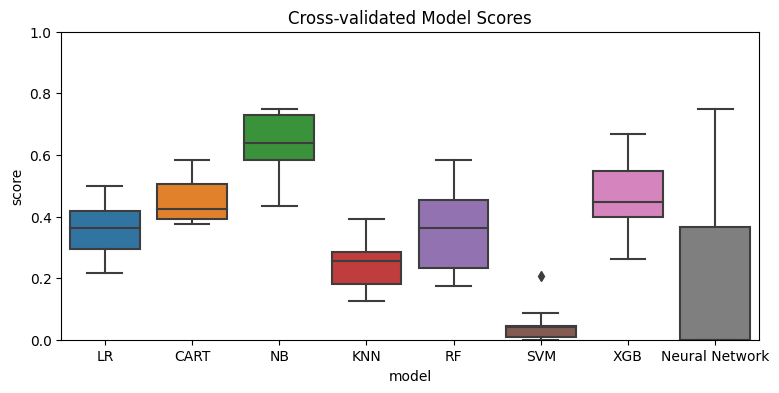

In [ ]:
scores_data = pd.DataFrame(data=np.array(scores), index=list(models.keys())).reset_index().rename(columns=dict(index="model"))
scores_data = pd.melt(scores_data, id_vars=["model"], value_vars=np.arange(0, 10)).rename(columns=dict(variable="fold", value="score"))

plt.figure(figsize=(9, 4))
sns.boxplot(data=scores_data, x="model", y="score")
plt.title("Cross-validated Model Scores")
plt.ylim((0, 1))
plt.show()